# Cramer's rule

We can solve a linear system of equation using Cramer's rule, which involves calculating some matrix determinants. However, this method is pretty slow for computers.

This method always works when we have the numbers of unknowns equal to the number of equations. Let's start with a system of two equations in two unknowns.

Suppose we have this linear system of equations:

$$
\begin{cases}
3x + 2y = -4 \\
-x + 2y = -2
\end{cases}
$$

This can be written as:

$$
\begin{pmatrix} 3 & 2 \\ -1 & 2 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -4 \\ -2 \end{pmatrix} \Rightarrow A\vec{x} = \vec{p}
$$


We can look at this as solving the problem of finding a vector in the input space ($\begin{pmatrix} x \\ y \end{pmatrix}$) where we know where it lands in the output space ($\begin{pmatrix} -4 \\ -2 \end{pmatrix}$) and we know the transformation matrix. Remember that the columns in the transformation matrix represents where the basis vectors will land after the transformation. 

In other words, we are searching the linear combination in the new basis (the transformed basis), that represent the vector in the new basis. We have already seen that this transformation is guaranteed to exist only if $\det(A) \neq 0$. In case $\det(A) = 0$ can happen that none of the input lands on that output or, if the output is in the span of the basis, a *line of inputs* land on that output. In the following, we consider only the case when $\det(A) \neq 0$, so for each input exists only one output and vice-versa.

The area of a parallelogram that has $\hat{i}$ and $\vec{x}$ as sides is $1*y = y$, while the area of the parallelogram having $\hat{j}$ and $\vec{x}$ as sides is $1*x = x$

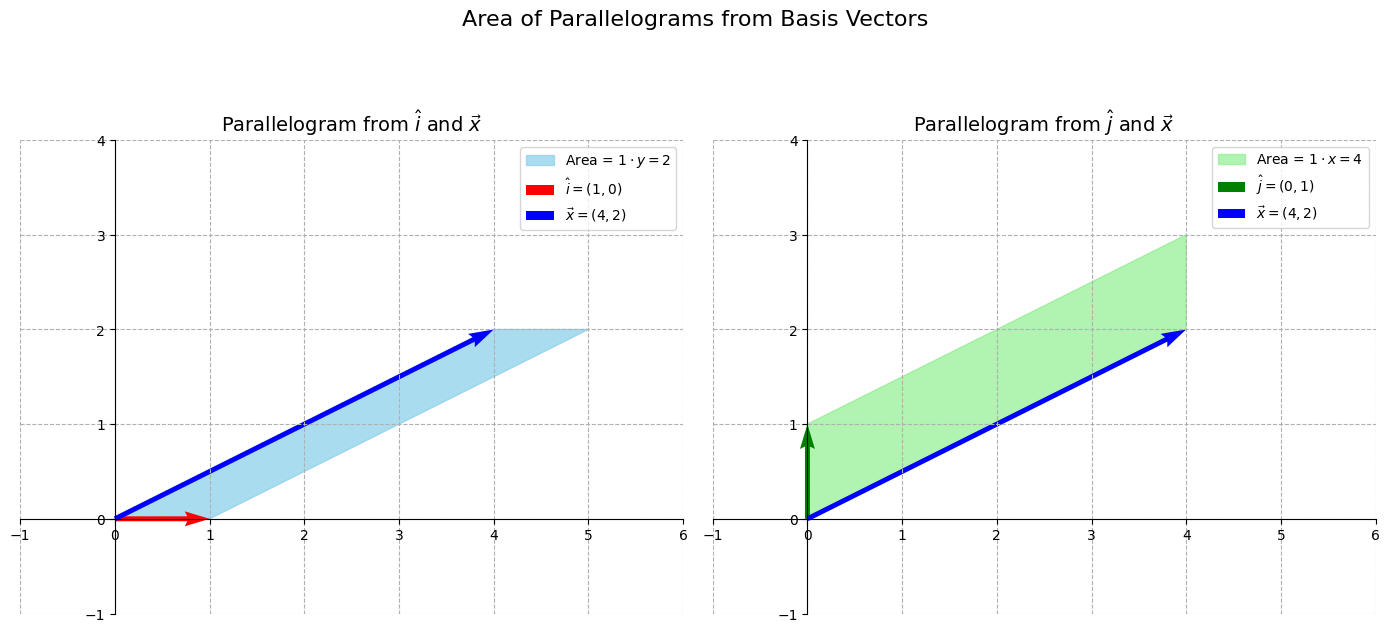

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Setup ---
# Define the vector x = (x, y)
x_val = 4
y_val = 2

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Area of Parallelograms from Basis Vectors', fontsize=16)

# --- 1. Parallelogram from i-hat and vector x ---

# Vertices of the parallelogram: O, i_hat, i_hat + x, x
p1_vertices = np.array([[0, 0], [1, 0], [1 + x_val, y_val], [x_val, y_val]])
parallelogram1 = plt.Polygon(p1_vertices, color='skyblue', alpha=0.7, label=f'Area = $1 \\cdot y = {y_val}$')
ax1.add_patch(parallelogram1)

# Draw the vectors
ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', label='$\\hat{i} = (1, 0)$')
ax1.quiver(0, 0, x_val, y_val, angles='xy', scale_units='xy', scale=1, color='blue', label=f'$\\vec{{x}} = ({x_val}, {y_val})$')

# Style the plot
ax1.set_title('Parallelogram from $\\hat{i}$ and $\\vec{x}$', fontsize=14)
ax1.grid(True, linestyle='--')
ax1.set_aspect('equal', adjustable='box')
ax1.set_xlim(-1, x_val + 2)
ax1.set_ylim(-1, y_val + 2)
# Move axes to origin
ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.legend()


# --- 2. Parallelogram from j-hat and vector x ---

# Vertices of the parallelogram: O, j_hat, j_hat + x, x
p2_vertices = np.array([[0, 0], [0, 1], [x_val, 1 + y_val], [x_val, y_val]])
parallelogram2 = plt.Polygon(p2_vertices, color='lightgreen', alpha=0.7, label=f'Area = $1 \\cdot x = {x_val}$')
ax2.add_patch(parallelogram2)

# Draw the vectors
ax2.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='green', label='$\\hat{j} = (0, 1)$')
ax2.quiver(0, 0, x_val, y_val, angles='xy', scale_units='xy', scale=1, color='blue', label=f'$\\vec{{x}} = ({x_val}, {y_val})$')

# Style the plot
ax2.set_title('Parallelogram from $\\hat{j}$ and $\\vec{x}$', fontsize=14)
ax2.grid(True, linestyle='--')
ax2.set_aspect('equal', adjustable='box')
ax2.set_xlim(-1, x_val + 2)
ax2.set_ylim(-1, y_val + 2)
# Move axes to origin
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.legend()


# --- Display Plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A negative area in this context represent a situation where the parallelogram ends up in the negative side of the basis vector.

What will be the area of this parallelogram after applying the transformation? Since the determinant is a quantity representing the scale factor of a matrix, it will be:

$$
Area = \det(A)*y \Rightarrow y = \frac{Area}{\det(A)}
$$

How do we compute the new area after the transformation? Well, we know where $\vec{x}$ lands: $\vec{p}$, and we also know where $\hat{i}$ lands, the first column of $A$. So:

$$
Area = \det(\begin{pmatrix} 3 & 2 \\ -1 & 2 \end{pmatrix})
$$

Hence:

$$
y = \frac{\det(\begin{pmatrix} 3 & -4 \\ -1 & -2 \end{pmatrix})}{\det(\begin{pmatrix} 3 & 2 \\ -1 & 2 \end{pmatrix})}
$$

and, in the same way:


$$
y = \frac{\det(\begin{pmatrix} -4 & 2 \\ -2 & 2 \end{pmatrix})}{\det(\begin{pmatrix} 3 & 2 \\ -1 & 2 \end{pmatrix})}
$$

We are solving for one unknonwn by computing the determinant of the transformation matrix and the determinant of the matrix obtained by replacing the column corrisponding to the unknown with $\vec{p}$, and the dividing this last determinant by the first one. This is valid for every unknown. This formula is known as *Cramer's rule*.